We give computer data and the computer gives us a solution. The computer learns the relationship in the data which we have give it as an input.

Main steps followed by any Machine Learning Algorithm to arrive at a solution : 

1. To make a prediction - Predicting anything maybe coefficients in a function. The very first prediction is a complete random guess.
2. Calculating the error - Measuring how good the prediction was. How far we were off the data.
3. Learning - This is where we adjust our initial predicion. After the machine has observed the error in the observation, we will make a new prediction and then will make a new prediction which will have modified coefficients. So with the help of new prediciton we calculate the error. We compare the error of first observation with second. Then we adjust the coefficients the 3rd time and then we keep on repeating the procedure until we find the best coefficients for a given equation which has the least or minimum error. This is the learning process since with each and every progressing round, the machine learns the best coefficients which minimize the error.

Residual Sum of Squares(R.S.S.) is an example of a cost function. The best solution is the one which has lowest cost function. So the minimization of cost function will lead to the best solution. 

R.S.S. = $$([y(i) - x(i)])^2$$, where y(i) is the points which are predicted by the model we have used and x(i) are the points which reflect the actual data points i.e. their positions. We are taking the square since we do not want the negative values.

The terms cost function, loss function, error function and objective function all are same and can be used interchangebly. The objective function is a generic term since it can refer to some other objective as well.

## Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Example 1 - A simple cost Function but just 2 methods of writing it

$f(x) = x^2 + x + 1$ # Using only one dollar sign in the beginning and at the end. For the below one we used 2 dollar signs instead of one at the beginning and at the end

$$f(x) = x^2 + x + 1$$ 

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

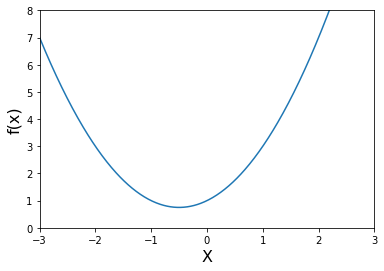

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show()

If we look at the graph above, we can see that at the point somewhere between -1 and 0, f(x) is getting minimized. When x=2, the cost would be decreasing a lot as we are moving down but when x=1, the cost is not much decreasing by not that much as it was when x was at 2 since the line just isn't as steep. When x = 0, the line is flattening out even more. Then we reach our minimum and then the cost starts increasing again as we move up the curve. The slope or steepness of the function is telling us when we have reached our minimum cost because slope is the rate of change and when the slope stops changing, on this graph the cost is equal to the lowest value. Slope is zero at the point where the cost is lowest.

## Slope and Derivatives

In [5]:
def df(x):
    return 2*x + 1

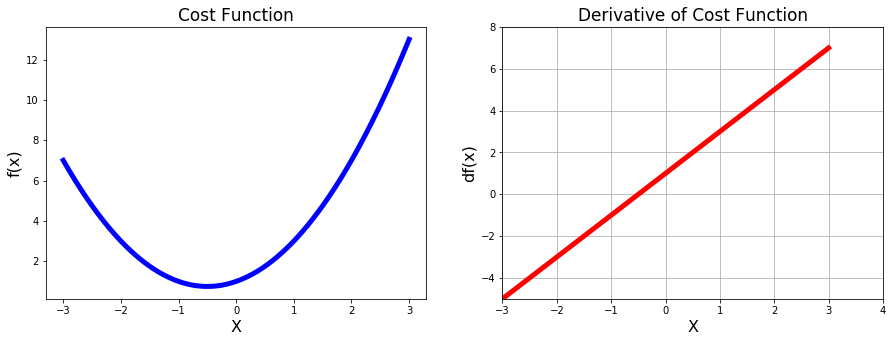

In [6]:
# Plotting the above graph and derivative graph side by side
plt.figure(figsize = [15,5])
# Cost Function
plt.xlim([-3,3])
plt.ylim(0,8)
plt.subplot(1,2,1) # subplot(row, column, number of entry). So it means the arrangement will be like 1 row and 2 columns and therefore it means in one row there will be 2 plots i.e. tw o plots stacked against each other.
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 5)
# Derivative graph 
plt.subplot(1,2,2) # subplot(row, column, number of entry). So it means the arrangement will be like 1 row and 2 columns and therefore it means in one row there will be 2 plots i.e. tw o plots stacked against each other.
plt.title('Derivative of Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1), color = 'red', linewidth = 5)
plt.xlim(-3,4)
plt.ylim(-5,8)
plt.show()


# Gradient Descent Algorithm

Gradient descent takes place on a cost function and the cost function actually does not look like a concave function i.e. the one which has a peak at the top. It would mean we have a maximum but we are not looking for maximums. We are looking for minimums. So the cost function would look like convex function i.e. the one which has a minimum and one needs to get to the bottom since that's where the cost is lowest. Gradient Descent is also referred to as steepest descent. It is an optimization algorithm which is used for finding out the minimum of a function. The function will take a step in the direction where the slope is the steepest i.e. the direction of the negative of the gradient and but by bit, it ends up at the bottom of the valley.

## Python Loops

In [7]:
# Python For loop
for n in range(5):
    print('Hello World', n)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [8]:
# Python While Loop. They can get into an infinite loop so need to be careful.
counter = 0
while counter<7:
    print('counting....',counter)
    counter = counter+1
print('Ready or not, here i come!')

counting.... 0
counting.... 1
counting.... 2
counting.... 3
counting.... 4
counting.... 5
counting.... 6
Ready or not, here i come!


In [14]:
# Gradient Descent simple example
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - gradient * step_multiplier
    step_size = abs(new_x - previous_x)
    x_list.append(df(new_x))
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

Loop ran this many times: 50


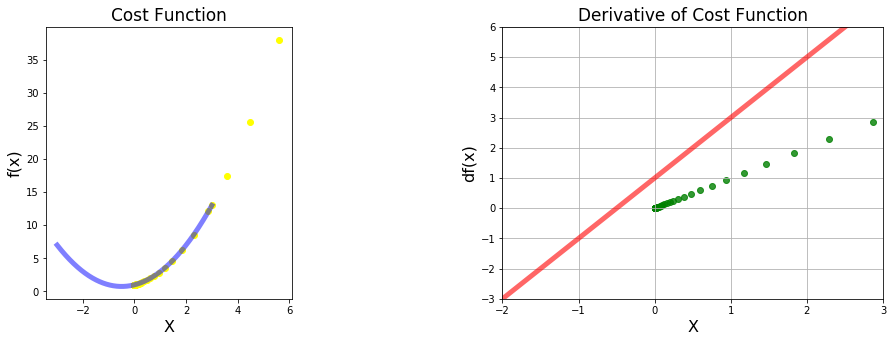

In [10]:
plt.figure(figsize = [15,5])
# Cost Function
plt.xlim([-3,10])
plt.ylim(0,40)
plt.subplot(1,3,1) # subplot(row, column, number of entry). So it means the arrangement will be like 1 row and 2 columns and therefore it means in one row there will be 2 plots i.e. tw o plots stacked against each other.
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 5,alpha=0.5)
values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'yellow')
# Derivative graph 
plt.subplot(1,2,2) # subplot(row, column, number of entry). So it means the arrangement will be like 1 row and 2 columns and therefore it means in one row there will be 2 plots i.e. tw o plots stacked against each other.
plt.title('Derivative of Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.plot(x_1, df(x_1), color = 'red', linewidth = 5,alpha = 0.6)
plt.scatter(x_list, slope_list, color = 'green',alpha = 0.8)
plt.show()

# Example 2 - Multiple Minima vs Initial guess and Advanced Functions
$$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# New data 
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

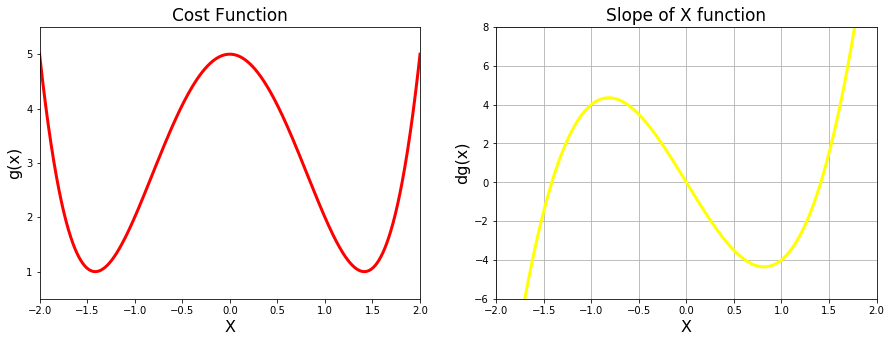

In [12]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2,g(x_2),color = 'red', linewidth = 3)
# Derivative graph
plt.subplot(1,2,2)
plt.title('Slope of X function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2,dg(x_2),color = 'yellow', linewidth = 3)
plt.show()

## Gradient Descent as a python Function

In [32]:
def gradient_descent(derivative_func,initial_guess,multiplier,precision,max_iter = 300):
# For indenting multiple lines, press ctrl + ]
# Pressing shift + tab on any function will give the details about it maybe from official documentation or if it's defined by user then the definition will vary
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - gradient * multiplier
        step_size = abs(new_x - previous_x)
        x_list.append(derivative_func(new_x))
        slope_list.append(df(new_x))
        if step_size < precision:
            break
    return new_x,x_list,slope_list

In [33]:
local_min,list_x,deriv_list = gradient_descent(dg, 0.5, 0.02,0.001) # We are sending a pointer of dg and not actual dg
print('Local Min occurs at:',local_min)
print('Numbrr of steps : ',len(list_x))

Local Min occurs at: 1.4122375085019094
Numbrr of steps :  23


In [34]:
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.5, multiplier = 0.02, precision = 0.001) # We are sending a pointer of dg and not actual dg
print('Local Min occurs at:',local_min)
print('Numbrr of steps : ',len(list_x))

Local Min occurs at: 1.4122375085019094
Numbrr of steps :  23


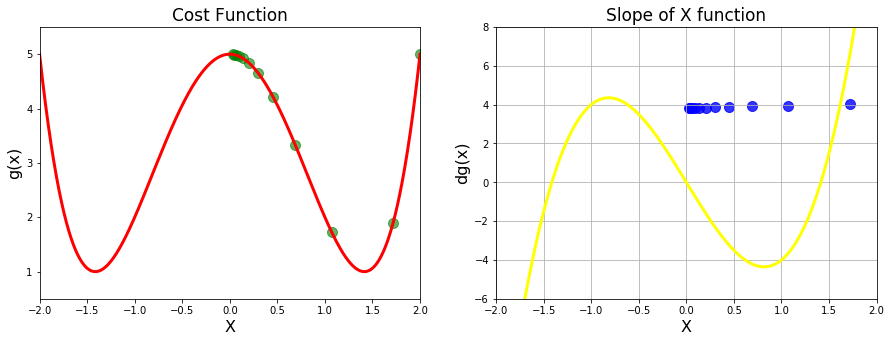

In [35]:
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = 2, multiplier = 0.02, precision = 0.001) # We are sending a pointer of dg and not actual dg
    
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2,g(x_2),color = 'red', linewidth = 3)
plt.scatter(list_x,g(np.array(list_x)),color = 'green',s = 100, alpha = 0.6)
# Derivative graph
plt.subplot(1,2,2)
plt.title('Slope of X function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2,dg(x_2),color = 'yellow', linewidth = 3)
plt.scatter(list_x,deriv_list,color = 'blue', s =100, alpha = 0.8)
plt.show()

### The problem with this algorithm is that when we choose different starting values, we get totally different results. For example, if we keep the starting value as negative, the minimum falls on the left minmum and when we choose a positive value as the starting value, we get the right minimum to be selected. This can cause a serious problem since we might have a situation like this shown below:

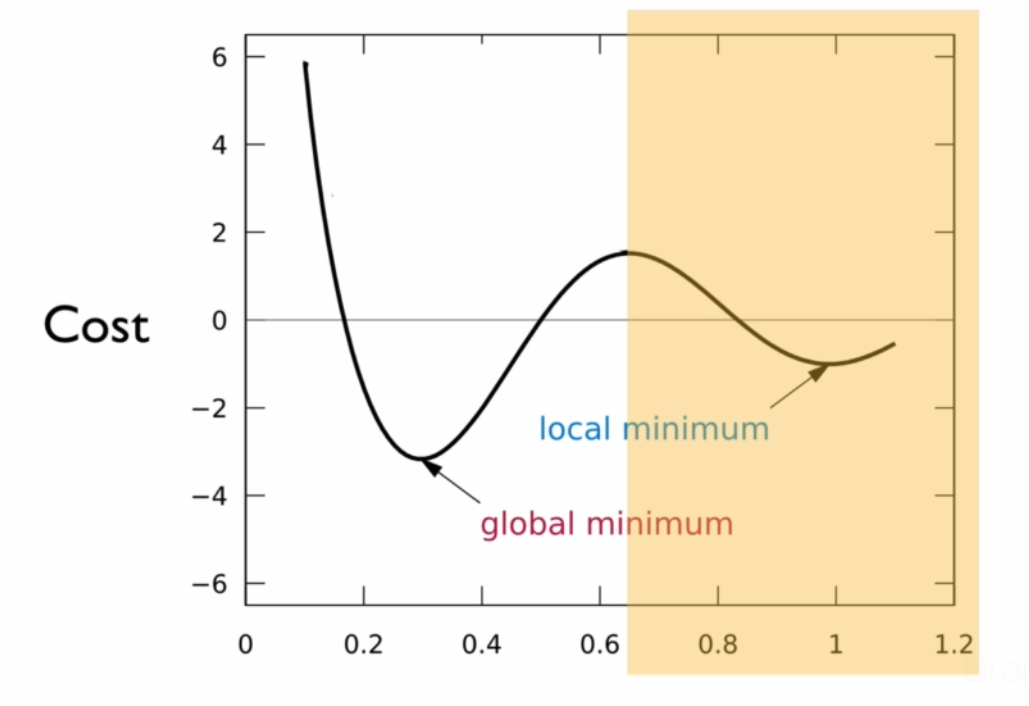

So here if a user chooses a negative value, the value will point finally to global minimum and if one chooses a positive initial value, the value will finally point to the local minimum. But unlike in the previous case, the values of global and local minimum are not same and the compututer will not get to know about it, and therefore it will act according to the algorithm.

We are currently doing batch gradient descent.

# Example 3 - Divergence, Overflow and python tuples

In [68]:
x_3 = np.linspace(start = -2.5,stop = 2.5, num = 1000)
def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

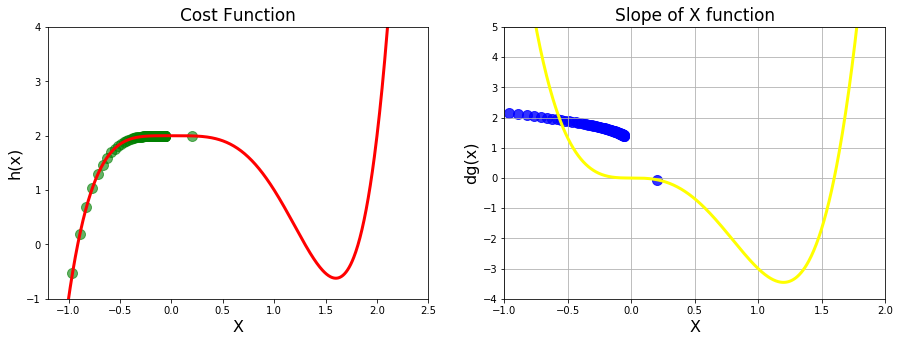

Local Min occurs at : 1.0858908268703547
Cost at this min is: 0.7290082698259561
Number of steps: 101


In [69]:
local_min,list_x,deriv_list = gradient_descent(derivative_func = dh, initial_guess = 0.2, multiplier = 0.02, precision = 0.001,max_iter=100) 
    
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.plot(x_3,h(x_3),color = 'red', linewidth = 3)
plt.scatter(list_x,h(np.array(list_x)),color = 'green',s = 100, alpha = 0.6)
# Derivative graph
plt.subplot(1,2,2)
plt.title('Slope of X function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.plot(x_3,dh(x_3),color = 'yellow', linewidth = 3)
plt.scatter(list_x,deriv_list,color = 'blue', s =100, alpha = 0.8)
plt.show()
print("Local Min occurs at :",local_min)
print("Cost at this min is:",h(local_min))
print("Number of steps:",len(list_x))

In [45]:
import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

In [46]:
type(h(local_min))

float

In [48]:
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

A data structure that is very similar to a list. It's just a sequence of values that is seperated by a comma.

In [56]:
# Tuple packing method of creating a tuple
breakfast = 'parantha','curd'
print(' I love {} and {} '.format(breakfast[0],breakfast[1]))

 I love parantha and curd 


In [58]:
print('There is no',breakfast[1])

There is no curd


In [64]:
numbers = 1,2,3 # It will give an error since it is having integers and no string,we need to convert int to string as shown below
print(' There are no '  + numbers[1] + ' people in the same place')

TypeError: can only concatenate str (not "int") to str

In [65]:
print(' There are no '  + str(numbers[1]) + ' people in the same place')

 There are no 2 people in the same place


In [67]:
# Alternatively, we can also modify the elements to string instead of keeping it as int. We will not get an error here.
numbers = '1','2','3'
print("There cannot be " + numbers[2]+" people on the same stone")

There cannot be 3 people on the same stone


In [71]:
# Tuples can contain heterogenous data which means that there can be elements belonging to different types in the same tuples but when it comes to lists, only homogenous elements are allowed which means that only one type of data type elements will be present in the same list.
# Tuples are immutable. We cannot change the tuple after we have made it neither add new values in the end of the tuple once it has been created, whereas in a list we can append new items in the list in the end.

# Learning Rate

If the learning rate is set to very high value, the algorithm may never converge to a minimum. On the contrary, if we take a very small learning rate, the algorithm might take a lot of time before it actually converges to the minimum, maybe it might take forever.

Will cover this later since it is lengthy!